In [1]:
from stock import stocks,pd,plt
import numpy as np

In [2]:
s = stocks()

In [3]:
dates = pd.date_range('2012-01-01', '2012-12-20')
symbol = ['AMD'];
df =s.get_datas(symbol, dates)
price = df[symbol[1]]

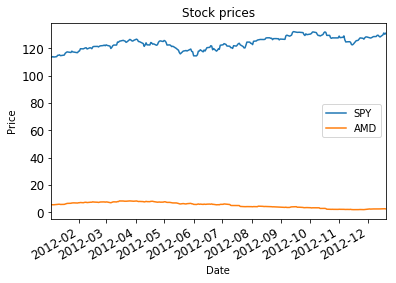

In [4]:
s.plot_data(df)

# Bollinger Bands
Bollinger Bands are a simple idea, you smooth out the stock data by computing the rolling mean (RM) of the dataset. The window should be 20 days. Now you need the rolling standard deviation (RSTD). All that is left is to add a band 2 * RSTD over and under your RM band

In [5]:
from util import get_rolling_mean, get_rolling_std, get_bollinger_bands
rm = get_rolling_mean(price, 25)
rstd = get_rolling_std(price, 25)
(upper, lower) = get_bollinger_bands(rm, rstd)

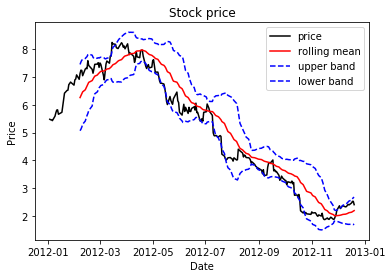

In [6]:
p_price = plt.plot(price.index, price.values, 'k-', label = 'price')
p_mean = plt.plot(rm.index, rm.values, 'r-',label='rolling mean')
p_upper = plt.plot(upper.index,upper.values, 'b--',label='upper band')
p_lower = plt.plot(lower.index,lower.values, 'b--', label='lower band')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock price')
plt.legend()
plt.show()

# Daily Returns

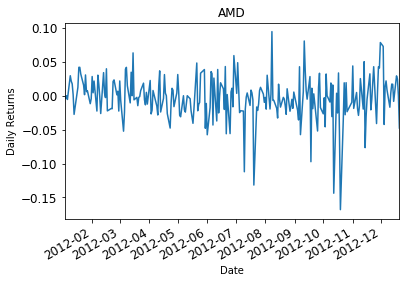

In [7]:
from util import get_daily_returns
dr = get_daily_returns(df)
s.plot_data(dr[symbol[1]], title=symbol[1], ylabel="Daily Returns")

# Histogram of Daily Returns

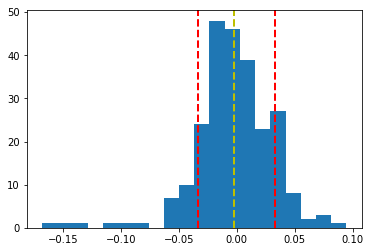

In [8]:
m = dr[symbol[1]].mean()
std = dr[symbol[1]].std()

plt.hist(dr[symbol[1]], bins = 20)
plt.axvline(m, color='y', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

# Scatterplot of Daily Return
This is useful to compare the daily return of V to SPY (S&P500).

beta: 2.32459097325
alpha: -0.00426598579313


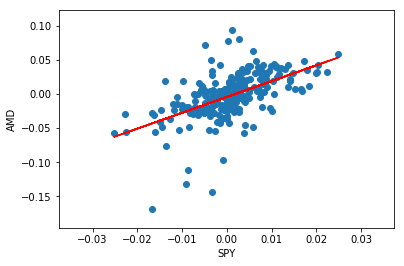

In [9]:
plt.scatter(x = dr[symbol[0]], y = dr[symbol[1]])
beta, alpha = np.polyfit(dr[symbol[0]], dr[symbol[1]], 1)
print("beta: " + str(beta))
print("alpha: " + str(alpha))
plt.plot(dr[symbol[0]], beta*dr[symbol[0]] + alpha, '-', color='r')

plt.ylabel(symbol[1])
plt.xlabel(symbol[0])
plt.show()

# Relative Strength

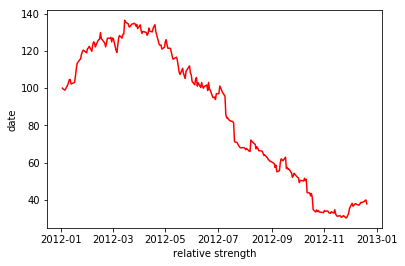

In [10]:
rs = df[symbol[1]] / df[symbol[0]]
rs = 100* rs/ rs[0]
plt.plot(rs.index, rs, '-', color='r')
plt.ylabel('date')
plt.xlabel('relative strength')
plt.show()